<a href="https://colab.research.google.com/github/rahulmnair1997/LabelMaster_Sales_Forecasting/blob/main/books_sarima_exog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
 
from itertools import product
from tqdm import tqdm_notebook

from sklearn.metrics import mean_squared_error

In [4]:
books = pd.read_csv('/content/drive/MyDrive/Label_Master Forecasting Datasets/Books_ext_fs.csv')
#books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LabelMaster/LabelMaster Data/Books_ext.csv')
sales = books[['Year_Month','Sum of Sales']]
sales

,Year_Month,Sum of Sales
0,2008-01,282604.11
1,2008-02,262474.40
2,2008-03,326059.68
3,2008-04,215387.49
4,2008-05,499559.90
...,...,...
150,2020-07,150348.10
151,2020-08,156066.95
152,2020-09,468710.96
153,2020-10,1118446.80


In [15]:
books = books.dropna(axis = 1)
exog = books.iloc[:,2:]
exog

,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,"OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking","New Truck Lead Time (N.A. Backlog/Build Ratio, months)_indicators_m_trucking",B50001_indicators_m_trucking,GMFN_indicators_m_trucking,G325_indicators_m_trucking,G332_indicators_m_trucking,ISM_indicators_m_trucking,PORTEU_indicators_m_trucking,MANEMP_indicators_m_trucking,USTRADE_indicators_m_trucking,LEI_indicators_m_trucking,SPREAD_indicators_m_trucking,D/GAL_indicators_m_trucking,D/STOCK_indicators_m_trucking,Change in Payroll Employment (000's)_driver_indicators_m_trucking,Change in Truck Emp. (000's)_driver_indicators_m_trucking,LABORINDEX_driver_indicators_m_trucking,"Total Class 8, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Class 8, North America_Factory Shipments (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Class 8, North America_Retail Sales (Ward's)_indicators_m_trucking_trailer","Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Class 8, North America_Inventories (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer","Total Trailers, U.S._Production_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Retail Sales (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer","Total Classes 4-7, North America_Inventories (Ward's)_Y/Y % Change_indicators_m_trucking_trailer","Class 4, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer","Class 4, North America_Retail Sales (Ward's)_indicators_m_trucking_trailer","Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer","Class 6-7 Bus, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer",FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer,FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Intermodal Loadings_Y/Y % Change_freight_m_trucking_trailer,"FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer",FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer,FTR Rail Carloadings_Y/Y % Change_freight_m_trucking_trailer,"FTR Class 8 Truck Utilization (%, SA)_freight_m_trucking_trailer",BUILD FOR_Total_Trailer,BUILD FOR_Flatbed,BUILD FOR_Liquid_Tank,BUILD FOR_Dry_Tank,BUILD FOR_Dump,BUILD FOR_Lowbed,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Po

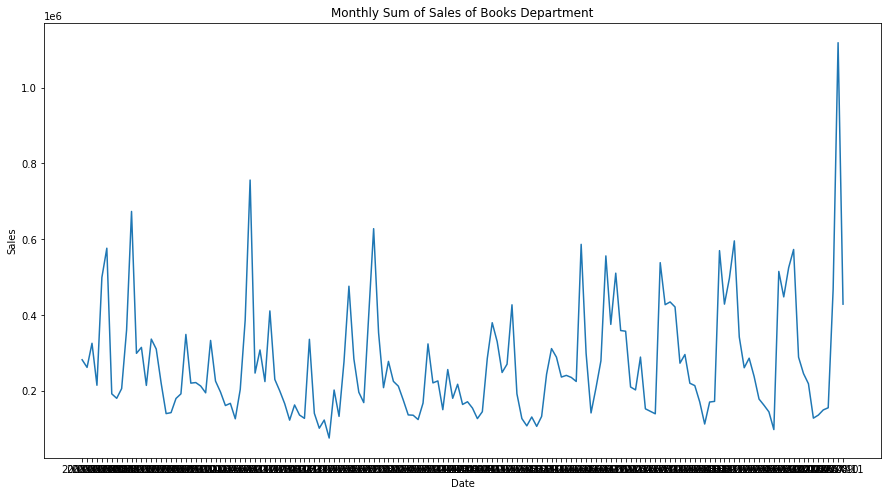

In [5]:
plt.figure(figsize=[15,8])
plt.plot(sales['Year_Month'],sales['Sum of Sales'])
plt.title('Monthly Sum of Sales of Books Department')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [6]:
ad_fuller_result = adfuller(sales['Sum of Sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.5489088668534055
p-value: 0.10402307648031173


Since the p-value is greater than 0.5, we cannot reject null hypothesis and must assume that the series is not stationary.

In [7]:
sales['sales_diffed'] = sales['Sum of Sales'].diff(1)
sales

,Year_Month,Sum of Sales,sales_diffed
0,2008-01,282604.11,NaN
1,2008-02,262474.40,-20129.71
2,2008-03,326059.68,63585.28
3,2008-04,215387.49,-110672.19
4,2008-05,499559.90,284172.41
...,...,...,...
150,2020-07,150348.10,13635.82
151,2020-08,156066.95,5718.85
152,2020-09,468710.96,312644.01
153,2020-10,1118446.80,649735.84


In [8]:
ad_fuller_result = adfuller(sales['sales_diffed'][1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.799805714064923
p-value: 4.6595513291859336e-07


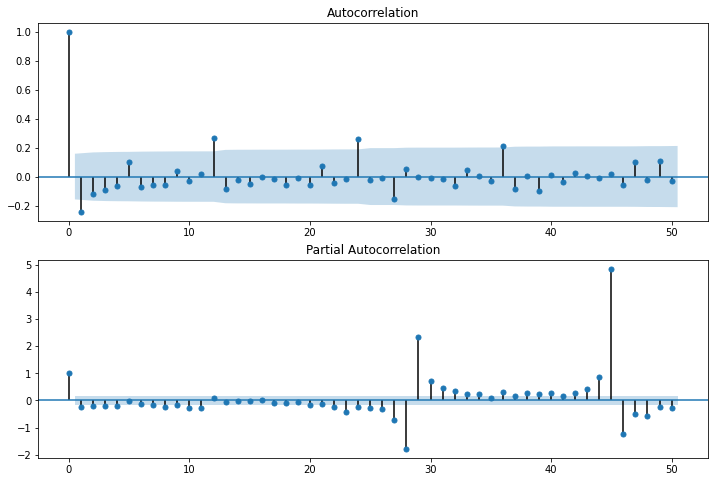

In [9]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
fig = sm.graphics.tsa.plot_acf(sales['sales_diffed'][1:], lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(sales['sales_diffed'][1:], lags=50, ax=ax[1])
plt.show()

# New Section

In [16]:
p = range(0,4)
d = range(1,2)
q = range(0,4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

df = pd.DataFrame()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales['Sum of Sales'],
                                            exog = exog,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}- AIC:{}'.format(param, param_seasonal, results.aic))

            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
            print(" ")
        except:
            continue
df.columns = ['param','param_seasonal', 'AIC']

ARIMA(0, 1, 0)x(0, 1, 0, 12)- AIC:4373.9493785983595
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)- AIC:3508.396441182058
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 2, 12)- AIC:3193.2448146069223
 
ARIMA(0, 1, 0)x(0, 1, 3, 12)- AIC:9044.622376871053
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12)- AIC:3533.4383589482172
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)- AIC:3509.8063097192817
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 2, 12)- AIC:3195.3357272605217
 
ARIMA(0, 1, 0)x(1, 1, 3, 12)- AIC:9210.288263251852
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(2, 1, 0, 12)- AIC:3216.5867010273537
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(2, 1, 1, 12)- AIC:3217.788168328135
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(2, 1, 2, 12)- AIC:3195.198719715115
 
ARIMA(0, 1, 0)x(2, 1, 3, 12)- AIC:9133.610177644776
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(3, 1, 0, 12)- AIC:2904.150186418607
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(3, 1, 1, 12)- AIC:2906.410956771907
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(3, 1, 2, 12)- AIC:2904.1502248474244
 
ARIMA(0, 1, 0)x(3, 1, 3, 12)- AIC:9303.634422046827
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)- AIC:3789.2112771188704
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)- AIC:3482.286152197547
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 2, 12)- AIC:3168.740547206946
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 3, 12)- AIC:8948.435870736172
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)- AIC:3533.5059477531963
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)- AIC:3484.5588945187696
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 2, 12)- AIC:3170.8213184122906
 
ARIMA(0, 1, 1)x(1, 1, 3, 12)- AIC:9112.302179027716
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(2, 1, 0, 12)- AIC:3218.7185097263637
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(2, 1, 1, 12)- AIC:3219.958583409059
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(2, 1, 2, 12)- AIC:3170.6779917066838
 
ARIMA(0, 1, 1)x(2, 1, 3, 12)- AIC:9035.1841208755
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(3, 1, 0, 12)- AIC:2906.1436930620534
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(3, 1, 1, 12)- AIC:2908.369477653121
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(3, 1, 2, 12)- AIC:2905.2886202759396
 
ARIMA(0, 1, 1)x(3, 1, 3, 12)- AIC:9207.872543434412
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(0, 1, 0, 12)- AIC:3765.2367236474347
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(0, 1, 1, 12)- AIC:3456.222657995871
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(0, 1, 2, 12)- AIC:3144.660084234985
 
ARIMA(0, 1, 2)x(0, 1, 3, 12)- AIC:9198.31917187381
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(1, 1, 0, 12)- AIC:3533.225742363412
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(1, 1, 1, 12)- AIC:3458.3095749155987
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(1, 1, 2, 12)- AIC:3146.645453618
 
ARIMA(0, 1, 2)x(1, 1, 3, 12)- AIC:9026.985353059921
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 1, 0, 12)- AIC:3220.875888774944
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 1, 1, 12)- AIC:3222.1029963215015
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 1, 2, 12)- AIC:3145.6418935562997
 
ARIMA(0, 1, 2)x(2, 1, 3, 12)- AIC:8950.62804547396
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(3, 1, 0, 12)- AIC:2906.1270312310417
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(3, 1, 1, 12)- AIC:2908.5045101155833
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(3, 1, 2, 12)- AIC:2907.5647291415003
 
ARIMA(0, 1, 2)x(3, 1, 3, 12)- AIC:9121.675233193459
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(0, 1, 0, 12)- AIC:3737.438678769763
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(0, 1, 1, 12)- AIC:3428.0242722439916
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(0, 1, 2, 12)- AIC:3120.4282473455496
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(0, 1, 3, 12)- AIC:8784.39989127759
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(1, 1, 0, 12)- AIC:3535.236506599476
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(1, 1, 1, 12)- AIC:3429.7365159980704
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(1, 1, 2, 12)- AIC:3121.87337496906
 
ARIMA(0, 1, 3)x(1, 1, 3, 12)- AIC:8945.153474937299
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(2, 1, 0, 12)- AIC:3222.725187999009
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(2, 1, 1, 12)- AIC:3223.773040146434
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(2, 1, 2, 12)- AIC:3119.4437690941627
 
ARIMA(0, 1, 3)x(2, 1, 3, 12)- AIC:8869.555355690263
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(3, 1, 0, 12)- AIC:2906.047477598882
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(3, 1, 1, 12)- AIC:2908.50098445451
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(3, 1, 2, 12)- AIC:2908.782807595138
 
ARIMA(0, 1, 3)x(3, 1, 3, 12)- AIC:9038.96287079774
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12)- AIC:3816.812996507092
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)- AIC:3508.8175809669724
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 2, 12)- AIC:3194.8462836908775
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 3, 12)- AIC:9033.421516829083
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)- AIC:3508.7675791512274
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)- AIC:3511.1985805706863
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 2, 12)- AIC:3196.81030964492
 
ARIMA(1, 1, 0)x(1, 1, 3, 12)- AIC:9198.844209715868
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(2, 1, 0, 12)- AIC:3193.322910320464
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(2, 1, 1, 12)- AIC:3194.721747855919
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(2, 1, 2, 12)- AIC:3196.9409032875433
 
ARIMA(1, 1, 0)x(2, 1, 3, 12)- AIC:9120.965400988573
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(3, 1, 0, 12)- AIC:2880.6829832911835
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(3, 1, 1, 12)- AIC:2882.864404875076
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(3, 1, 2, 12)- AIC:2880.051038497816
 
ARIMA(1, 1, 0)x(3, 1, 3, 12)- AIC:9295.295058395648
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)- AIC:3790.7691983620944
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)- AIC:3482.8204485545284
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 2, 12)- AIC:3170.2667352169897
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 3, 12)- AIC:8949.968080297846
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)- AIC:3508.227906951553
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)- AIC:3485.008819460113
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 2, 12)- AIC:3169.5964479461827
 
ARIMA(1, 1, 1)x(1, 1, 3, 12)- AIC:9113.834349500969
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 1, 0, 12)- AIC:3194.0286952827373
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 1, 1, 12)- AIC:3195.82994039187
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 1, 2, 12)- AIC:3171.0996893727493
 
ARIMA(1, 1, 1)x(2, 1, 3, 12)- AIC:9357.250792758787
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(3, 1, 0, 12)- AIC:2880.746712576928
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(3, 1, 1, 12)- AIC:2882.822118767036
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(3, 1, 2, 12)- AIC:2882.1267356878657
 
ARIMA(1, 1, 1)x(3, 1, 3, 12)- AIC:9209.404713907645
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(0, 1, 0, 12)- AIC:3767.1300117507544
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(0, 1, 1, 12)- AIC:3458.2086090690673
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(0, 1, 2, 12)- AIC:3146.8096328493325
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(0, 1, 3, 12)- AIC:8866.599091369744
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 1, 0, 12)- AIC:3509.904775226568
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 1, 1, 12)- AIC:3460.4961514091633
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 1, 2, 12)- AIC:3145.5867945703067
 
ARIMA(1, 1, 2)x(1, 1, 3, 12)- AIC:9028.90895405463
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 0, 12)- AIC:3196.129679933412
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 1, 12)- AIC:3198.676094144444
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 2, 12)- AIC:3147.032229182498
 
ARIMA(1, 1, 2)x(2, 1, 3, 12)- AIC:8952.55164644404
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(3, 1, 0, 12)- AIC:2879.7873104945343
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(3, 1, 1, 12)- AIC:2881.8215817659093
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(3, 1, 2, 12)- AIC:2884.5289299318565
 
ARIMA(1, 1, 2)x(3, 1, 3, 12)- AIC:9123.598834188033
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(0, 1, 0, 12)- AIC:3739.227139255075
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(0, 1, 1, 12)- AIC:3429.7436883731266
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(0, 1, 2, 12)- AIC:3122.1493189437865
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(0, 1, 3, 12)- AIC:8786.087776287883
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(1, 1, 0, 12)- AIC:3511.8743642141944
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(1, 1, 1, 12)- AIC:3431.516660523531
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(1, 1, 2, 12)- AIC:3121.741859773541
 
ARIMA(1, 1, 3)x(1, 1, 3, 12)- AIC:8946.841212605494
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(2, 1, 0, 12)- AIC:3198.4547632382846
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(2, 1, 1, 12)- AIC:3200.7189540811023
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(2, 1, 2, 12)- AIC:3119.4766293049906
 
ARIMA(1, 1, 3)x(2, 1, 3, 12)- AIC:8871.244655528126
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(3, 1, 0, 12)- AIC:2881.374034916696
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(3, 1, 1, 12)- AIC:2883.335282876656
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(3, 1, 2, 12)- AIC:2885.3846184465197
 
ARIMA(1, 1, 3)x(3, 1, 3, 12)- AIC:9040.650608465812
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(0, 1, 0, 12)- AIC:3789.973818702806
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(0, 1, 1, 12)- AIC:3508.394356892215
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(0, 1, 2, 12)- AIC:3196.757693302502
 
ARIMA(2, 1, 0)x(0, 1, 3, 12)- AIC:9033.783112366904
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(1, 1, 0, 12)- AIC:3483.0603240854934
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(1, 1, 1, 12)- AIC:3485.2946191803567
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(1, 1, 2, 12)- AIC:3198.727839818193
 
ARIMA(2, 1, 0)x(1, 1, 3, 12)- AIC:9199.205800881527
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 1, 0, 12)- AIC:3168.518579984139
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 1, 1, 12)- AIC:3169.916245966566
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 1, 2, 12)- AIC:3171.3411492903756
 
ARIMA(2, 1, 0)x(2, 1, 3, 12)- AIC:9121.326992143999
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(3, 1, 0, 12)- AIC:2856.6454493919655
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(3, 1, 1, 12)- AIC:2858.8845018394395
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(3, 1, 2, 12)- AIC:2856.7031149003674
 
ARIMA(2, 1, 0)x(3, 1, 3, 12)- AIC:9208.63134813693
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(0, 1, 0, 12)- AIC:3791.210683000352
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(0, 1, 1, 12)- AIC:3484.618356114312
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(0, 1, 2, 12)- AIC:3171.8089780499877
 
ARIMA(2, 1, 1)x(0, 1, 3, 12)- AIC:8950.901305536183
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 1, 0, 12)- AIC:3484.6200683064317
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 1, 1, 12)- AIC:3486.410529638575
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 1, 2, 12)- AIC:3171.4949454358707
 
ARIMA(2, 1, 1)x(1, 1, 3, 12)- AIC:9114.767548098134
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 1, 0, 12)- AIC:3170.525256297148
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 1, 1, 12)- AIC:3171.663338679692
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 1, 2, 12)- AIC:3171.324288195546
 
ARIMA(2, 1, 1)x(2, 1, 3, 12)- AIC:9037.649489896081
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(3, 1, 0, 12)- AIC:2853.470995970646
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(3, 1, 1, 12)- AIC:2855.4142717320583
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(3, 1, 2, 12)- AIC:2858.248243463656
 
ARIMA(2, 1, 1)x(3, 1, 3, 12)- AIC:9210.337912504849
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 1, 0, 12)- AIC:3766.859381819543
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 1, 1, 12)- AIC:3459.7007587109747
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 1, 2, 12)- AIC:3148.814520261531
 
ARIMA(2, 1, 2)x(0, 1, 3, 12)- AIC:8868.25688649838
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 0, 12)- AIC:3486.0230834371996
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 1, 12)- AIC:3461.5403496905496
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 2, 12)- AIC:3147.538214013781
 
ARIMA(2, 1, 2)x(1, 1, 3, 12)- AIC:9030.566472324943
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 0, 12)- AIC:3171.1757144409607
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 1, 12)- AIC:3172.475040793576
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 2, 12)- AIC:3146.948236477429
 
ARIMA(2, 1, 2)x(2, 1, 3, 12)- AIC:9226.15738443857
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(3, 1, 0, 12)- AIC:2853.3116001003564
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(3, 1, 1, 12)- AIC:2855.658437927472
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(3, 1, 2, 12)- AIC:2858.267180993663
 
ARIMA(2, 1, 2)x(3, 1, 3, 12)- AIC:9125.25635245839
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(0, 1, 0, 12)- AIC:3740.851751716309
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(0, 1, 1, 12)- AIC:3431.1792626895754
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(0, 1, 2, 12)- AIC:3124.188005996575
 
ARIMA(2, 1, 3)x(0, 1, 3, 12)- AIC:8788.03854413082
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(1, 1, 0, 12)- AIC:3487.8670013362016
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(1, 1, 1, 12)- AIC:3431.7182353825056
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(1, 1, 2, 12)- AIC:3123.724416516194
 
ARIMA(2, 1, 3)x(1, 1, 3, 12)- AIC:8948.792054831561
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(2, 1, 0, 12)- AIC:3172.957724271794
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(2, 1, 1, 12)- AIC:3172.0785681210614
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(2, 1, 2, 12)- AIC:3119.369574323351
 
ARIMA(2, 1, 3)x(2, 1, 3, 12)- AIC:8873.188266391666
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(3, 1, 0, 12)- AIC:2856.1673309646712
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(3, 1, 1, 12)- AIC:2857.9309658470283
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(3, 1, 2, 12)- AIC:2860.4131218003795
 
ARIMA(2, 1, 3)x(3, 1, 3, 12)- AIC:9042.60145069183
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(0, 1, 0, 12)- AIC:3765.9250426708113
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(0, 1, 1, 12)- AIC:3510.095359838426
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(0, 1, 2, 12)- AIC:3198.8510871443323
 
ARIMA(3, 1, 0)x(0, 1, 3, 12)- AIC:9035.716522422405
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(1, 1, 0, 12)- AIC:3458.4253729529096
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(1, 1, 1, 12)- AIC:3460.6234588050106
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(1, 1, 2, 12)- AIC:3200.9217904038674
 
ARIMA(3, 1, 0)x(1, 1, 3, 12)- AIC:9201.139206677322
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(2, 1, 0, 12)- AIC:3145.0462329140178
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(2, 1, 1, 12)- AIC:3146.367509305894
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(2, 1, 2, 12)- AIC:3147.7518692228255
 
ARIMA(3, 1, 0)x(2, 1, 3, 12)- AIC:9123.260397945856
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(3, 1, 0, 12)- AIC:2832.3723742020234
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(3, 1, 1, 12)- AIC:2834.528532651603
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 0)x(3, 1, 2, 12)- AIC:2832.7881152755012
 
ARIMA(3, 1, 0)x(3, 1, 3, 12)- AIC:9123.540720969371
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(0, 1, 0, 12)- AIC:3767.3283068301253
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(0, 1, 1, 12)- AIC:3486.56799848791
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(0, 1, 2, 12)- AIC:3173.7986867593977
 
ARIMA(3, 1, 1)x(0, 1, 3, 12)- AIC:8952.901350500437
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(1, 1, 0, 12)- AIC:3460.2425052260974
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(1, 1, 1, 12)- AIC:3462.5389649535223
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(1, 1, 2, 12)- AIC:3173.3402242635825
 
ARIMA(3, 1, 1)x(1, 1, 3, 12)- AIC:9116.767548098154
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(2, 1, 0, 12)- AIC:3145.391459459897
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(2, 1, 1, 12)- AIC:3147.7961015702576
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(2, 1, 2, 12)- AIC:3148.430883940171
 
ARIMA(3, 1, 1)x(2, 1, 3, 12)- AIC:9295.1428672434
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(3, 1, 0, 12)- AIC:2828.563996304415
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(3, 1, 1, 12)- AIC:2830.23451844824
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 1)x(3, 1, 2, 12)- AIC:2835.103424642477
 
ARIMA(3, 1, 1)x(3, 1, 3, 12)- AIC:9125.315432576917
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(0, 1, 0, 12)- AIC:3769.0234695954655
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(0, 1, 1, 12)- AIC:3461.5996132080654
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(0, 1, 2, 12)- AIC:3150.301578184272
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(0, 1, 3, 12)- AIC:8870.010288042713
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(1, 1, 0, 12)- AIC:3461.4927697284143
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(1, 1, 1, 12)- AIC:3463.555290263974
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(1, 1, 2, 12)- AIC:3149.278072376258
 
ARIMA(3, 1, 2)x(1, 1, 3, 12)- AIC:9032.320606271143
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(2, 1, 0, 12)- AIC:3148.2521273415186
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(2, 1, 1, 12)- AIC:3150.813334222642
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(2, 1, 2, 12)- AIC:3151.0136738349274
 
ARIMA(3, 1, 2)x(2, 1, 3, 12)- AIC:8955.963298655952
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(3, 1, 0, 12)- AIC:2830.242310447152
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(3, 1, 1, 12)- AIC:2831.9341403045883
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(3, 1, 2, 12)- AIC:2835.156960637592
 
ARIMA(3, 1, 2)x(3, 1, 3, 12)- AIC:9127.010486404739
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(0, 1, 0, 12)- AIC:3743.053608107477
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(0, 1, 1, 12)- AIC:3431.2261214452124
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(0, 1, 2, 12)- AIC:3123.1997926673075
 
ARIMA(3, 1, 3)x(0, 1, 3, 12)- AIC:8789.72421096738
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(1, 1, 0, 12)- AIC:3457.8390744390686
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(1, 1, 1, 12)- AIC:3433.316189191333
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(1, 1, 2, 12)- AIC:3125.1469288542353
 
ARIMA(3, 1, 3)x(1, 1, 3, 12)- AIC:8950.477809537604
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(2, 1, 0, 12)- AIC:3148.548457003529
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(2, 1, 1, 12)- AIC:3150.33261479567
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(2, 1, 2, 12)- AIC:3120.072269144472
 
ARIMA(3, 1, 3)x(2, 1, 3, 12)- AIC:8874.881252415833
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(3, 1, 0, 12)- AIC:2832.4860483301163
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(3, 1, 1, 12)- AIC:2833.5048555954404
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(3, 1, 2, 12)- AIC:2837.3133767627805
 
ARIMA(3, 1, 3)x(3, 1, 3, 12)- AIC:9044.287205397863
 


In [17]:
df = df.sort_values('AIC').reset_index(drop= True)
df

,param,param_seasonal,AIC
0,"(3, 1, 1)","(3, 1, 0, 12)",2828.563996
1,"(3, 1, 1)","(3, 1, 1, 12)",2830.234518
2,"(3, 1, 2)","(3, 1, 0, 12)",2830.242310
3,"(3, 1, 2)","(3, 1, 1, 12)",2831.934140
4,"(3, 1, 0)","(3, 1, 0, 12)",2832.372374
...,...,...,...
251,"(2, 1, 2)","(2, 1, 3, 12)",9226.157384
252,"(3, 1, 1)","(2, 1, 3, 12)",9295.142867
253,"(1, 1, 0)","(3, 1, 3, 12)",9295.295058
254,"(0, 1, 0)","(3, 1, 3, 12)",9303.634422


The above output suggests that SARIMAX(3,1,1)(3,1,0,12) yields the lowest AIC value of 2828.563996. Therefore we should consider this to be the optimal option.

In [20]:
mod = sm.tsa.statespace.SARIMAX(sales['Sum of Sales'],
                                exog = exog,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 0, 12))
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                       Sum of Sales   No. Observations:                  155
Model:             SARIMAX(3, 1, 1)x(3, 1, 0, 12)   Log Likelihood               -1848.107
Date:                            Tue, 09 Mar 2021   AIC                           3852.214
Time:                                    23:27:16   BIC                           4082.768
Sample:                                         0   HQIC                          3945.902
                                            - 155                                         
Covariance Type:                              opg                                         
                                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

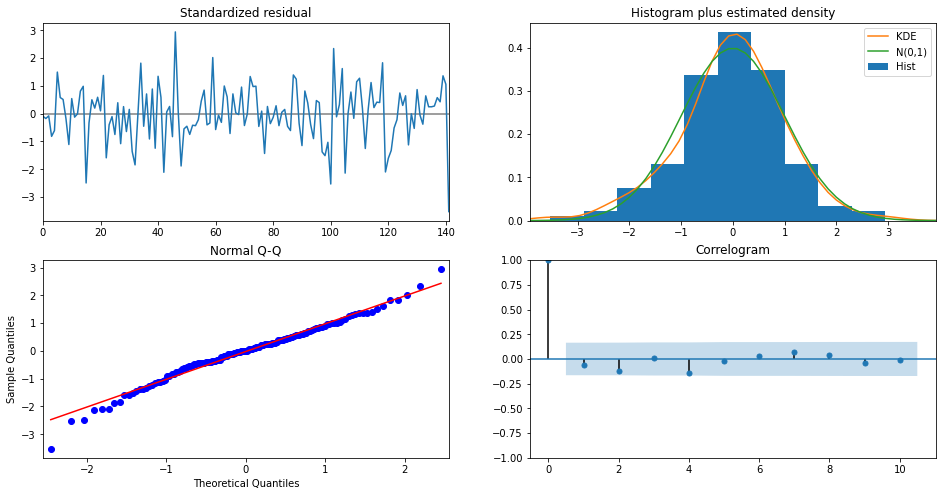

In [21]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Here we will forecast the values using the model. Can change starting point from which we need to forecast. For now we will keep starting point after 50 observations

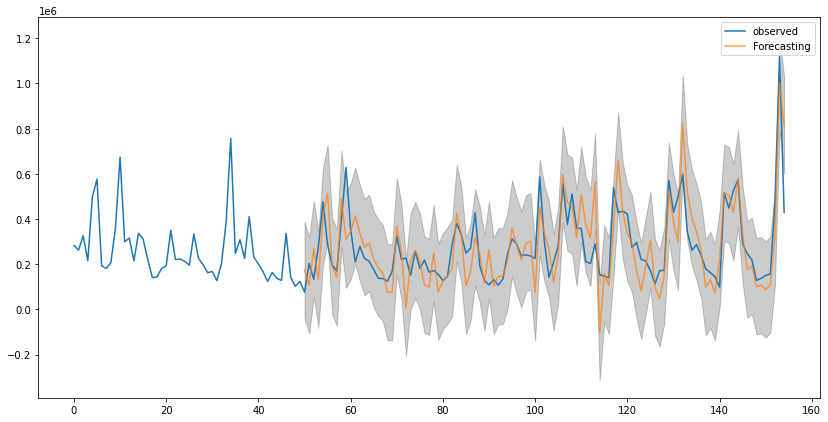

In [22]:
#Point from which prediction starts
start_point = 50
pred = results.get_prediction(start=start_point, dynamic=False)
pred_ci = pred.conf_int()
ax = sales['Sum of Sales'].plot(label='observed',)
pred.predicted_mean.plot(ax=ax, label='Forecasting', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()

# Model Evaluation
### Forecast Bias
Forecast errors can be positive and negative. This means that when the average of these values is calculated, an ideal mean forecast error would be zero.
A mean forecast error value other than zero suggests a tendency of the model to over forecast (negative error) or under forecast (positive error).

In [23]:
predictions = pred.predicted_mean
actual = sales['Sum of Sales'][start_point:]
error = predictions - actual
bias = sum(error)/len(error)
print(f'Bias: {bias}')

Bias: -196.80117598902655


Here we have a negative bias, meaning we over forecast. Lets look into other metrics for model evaulation

### MAE (Mean Absolute Error)
The mean absolute error, or MAE, is calculated as the average of the forecast error values, where all of the forecast error values are forced to be positive.

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MAE = mean_absolute_error(actual,predictions)
print(f'Mean Absolute Error: {MAE}')

Mean Absolute Error: 84610.80799042944


### MSE (Mean Squared Error)
The mean squared error, or MSE, is calculated as the average of the squared forecast error values. Squaring the forecast error values forces them to be positive; it also has the effect of putting more weight on large errors.

In [25]:
MSE = mean_squared_error(predictions,actual)
print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 12545958694.81815


### RMSE (Root Mean Squared Error)
The mean squared error described above is in the squared units of the predictions.

It can be transformed back into the original units of the predictions by taking the square root of the mean squared error score. This is called the root mean squared error, or RMSE.

In [26]:
from math import sqrt
RMSE = sqrt(MSE)
print(f'Root Mean Squared Error: {RMSE}')

Root Mean Squared Error: 112008.74383198014
